<a href="https://colab.research.google.com/github/skyler-ud/FDSFE_SLindsey/blob/main/labs/3_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
dfgrouped = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/bitcoin_volume.csv',index_col=0)
dfgrouped.head()

,Volume
Date,
2012-01-01,10.000000
2012-01-02,10.100000
2012-01-03,107.085281
2012-01-04,107.233260
2012-01-05,70.328742


In [8]:
dfgrouped.tail()

,Volume
Date,
2014-12-29,5317.387194
2014-12-30,7673.202917
2014-12-31,7567.614615
2015-01-01,4791.695273
2015-01-02,1651.384036


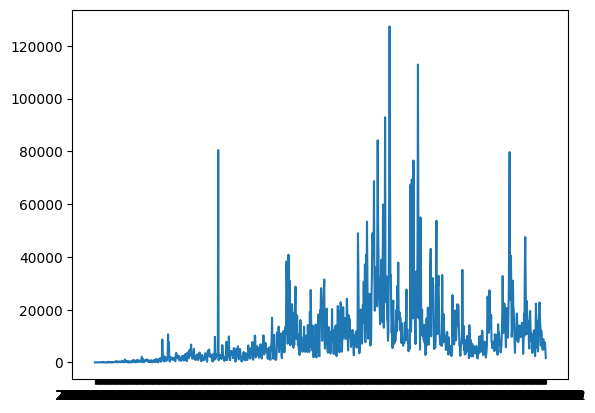

In [9]:
plt.plot(dfgrouped)

In [13]:
dfgrouped.index=pd.to_datetime(dfgrouped.index)

(array([15340., 15461., 15584., 15706., 15826., 15949., 16071., 16191.,
        16314., 16436.]),
 [Text(15340.0, 0, '2012-01'),
  Text(15461.0, 0, '2012-05'),
  Text(15584.0, 0, '2012-09'),
  Text(15706.0, 0, '2013-01'),
  Text(15826.0, 0, '2013-05'),
  Text(15949.0, 0, '2013-09'),
  Text(16071.0, 0, '2014-01'),
  Text(16191.0, 0, '2014-05'),
  Text(16314.0, 0, '2014-09'),
  Text(16436.0, 0, '2015-01')])

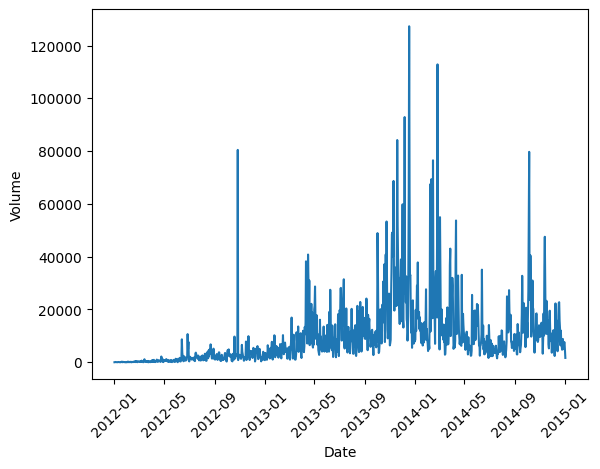

In [17]:
plt.plot(dfgrouped.index,dfgrouped['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)

In [18]:
dfshort=dfgrouped.iloc[200:500]

(array([15553., 15584., 15614., 15645., 15675., 15706., 15737., 15765.,
        15796., 15826.]),
 [Text(15553.0, 0, '2012-08'),
  Text(15584.0, 0, '2012-09'),
  Text(15614.0, 0, '2012-10'),
  Text(15645.0, 0, '2012-11'),
  Text(15675.0, 0, '2012-12'),
  Text(15706.0, 0, '2013-01'),
  Text(15737.0, 0, '2013-02'),
  Text(15765.0, 0, '2013-03'),
  Text(15796.0, 0, '2013-04'),
  Text(15826.0, 0, '2013-05')])

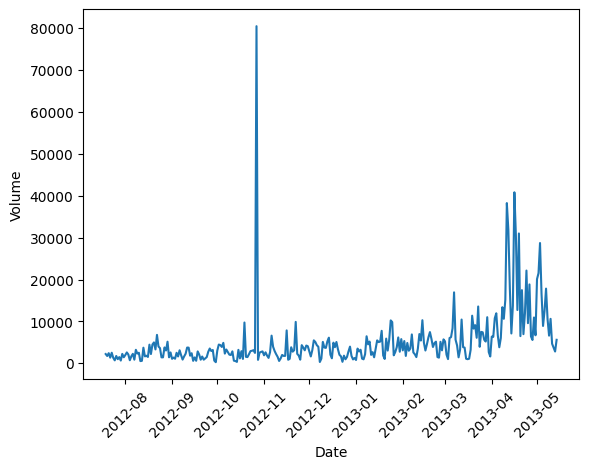

In [20]:
plt.plot(dfshort.index,dfshort['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)

In [41]:
rollingobj=dfshort.rolling(window=10,center=True)

In [42]:
mean=rollingobj.mean()
stdev=rollingobj.std()

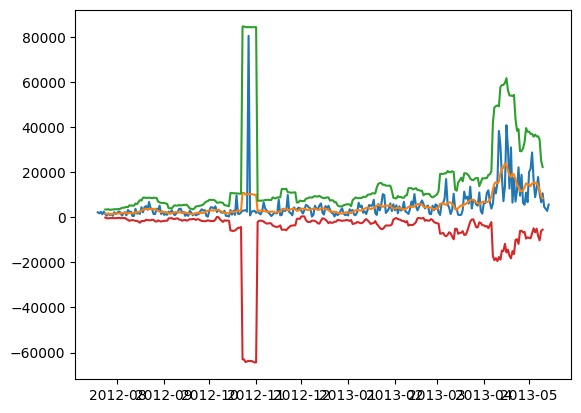

In [43]:
#dfshort['Volume'].plot()
#mean.plot(ax=ax)
plt.plot(dfshort['Volume'])
plt.plot(mean)
plt.plot(mean+stdev*3)
plt.plot(mean-stdev*3)
plt.show()

In [44]:
np.where((dfshort['Volume']<(mean['Volume']-3*stdev['Volume']))+((dfshort['Volume']>(mean['Volume']+3*stdev['Volume']))))

(array([], dtype=int64),)

In [60]:
mean1=dfshort['Volume'].rolling(window=11,center=True).apply(lambda x: np.mean(np.concatenate([x[:10],x[11:]])))
stdev1=dfshort['Volume'].rolling(window=11,center=True).apply(lambda x: np.std(np.concatenate([x[:10],x[11:]])))

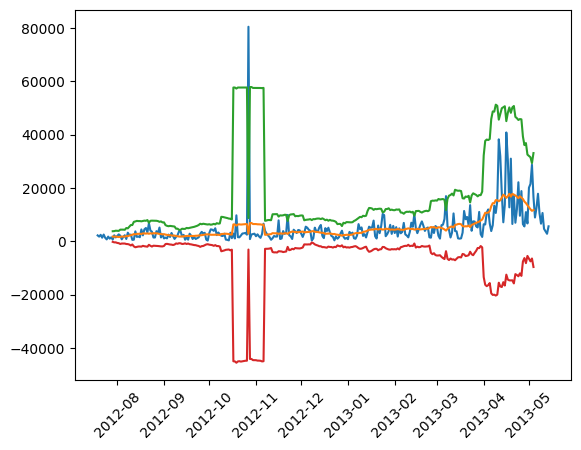

In [59]:
plt.plot(dfshort['Volume'])
plt.plot(mean1)
plt.plot(mean1+stdev1*3)
plt.plot(mean1-stdev1*3)
plt.xticks(rotation=45)
plt.show()